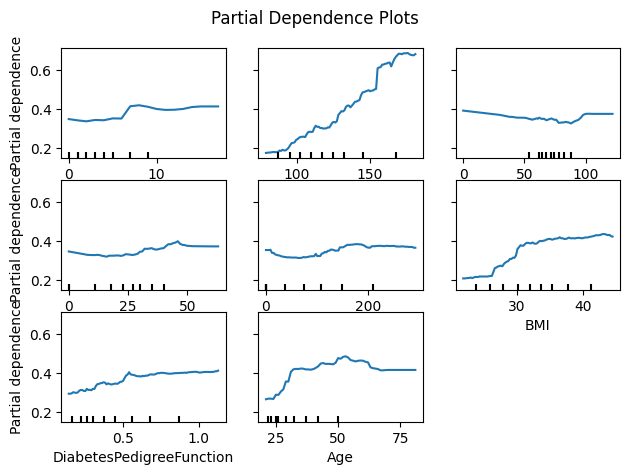

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

# Load dataset
df = pd.read_csv('Dataset/diabetes.csv')

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Plot PDP for selected features
features_to_plot = X.columns.tolist()
PartialDependenceDisplay.from_estimator(model, X_train, features=features_to_plot)
plt.suptitle("Partial Dependence Plots")
plt.tight_layout()
plt.show()


In [18]:
from tensorflow.keras.applications import MobileNet,EfficientNetB0,VGG16
from tensorflow.keras.models import save_model

# Load pretrained MobileNet with imagenet weights
model = VGG16(weights='imagenet', include_top=True)

# Save the model
model.save('VGG16.h5')
print("Model saved as mobilenet_model.h5")


Model saved as mobilenet_model.h5


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.gradcam import Gradcam

1/1 [==============================] - 2s 2s/step


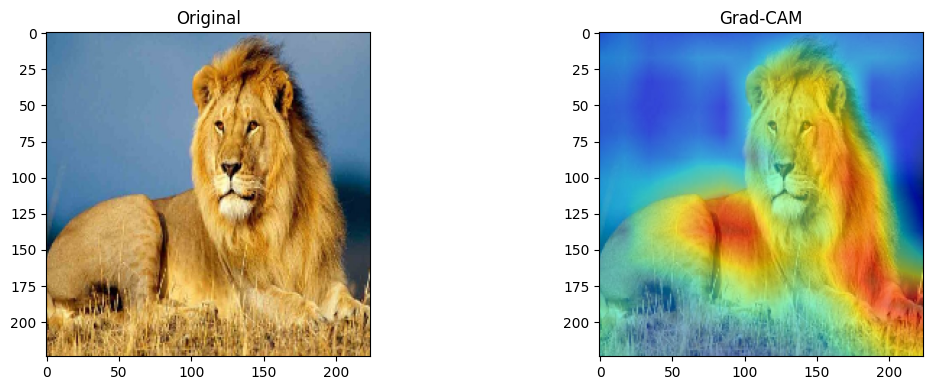

In [3]:
model = load_model('VGG16.h5')
img = load_img('lion.jpg', target_size=(224, 224))
img_array = img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

# Grad-CAM
score = CategoricalScore([np.argmax(model.predict(img_input))])
gradcam = Gradcam(model, model_modifier=ReplaceToLinear())
cam = gradcam(score, img_input, penultimate_layer=-1)  # auto-detect last conv layer

# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(img_array)
ax[1].imshow(cam[0], cmap='jet', alpha=0.5)
ax[1].set_title("Grad-CAM")
plt.tight_layout()
plt.show()

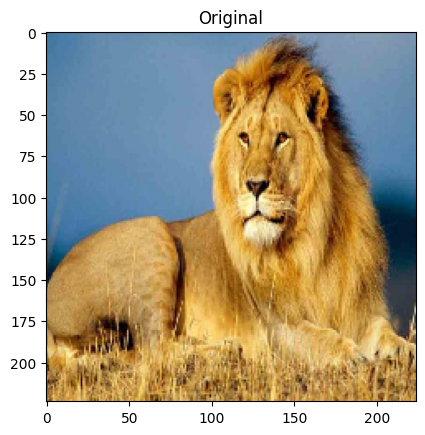

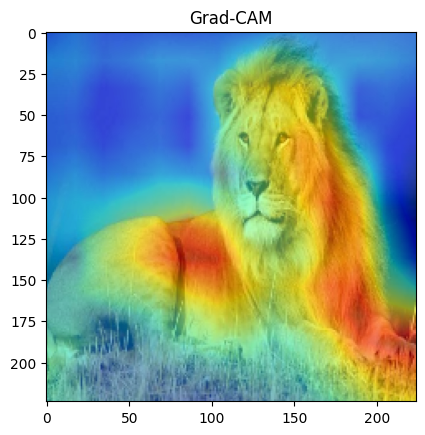

In [12]:
# Show original image
plt.figure()
plt.imshow(img)
plt.title("Original")
plt.show()

# Show Grad-CAM overlay
plt.figure()
plt.imshow(img)
plt.imshow(cam[0], cmap='jet',alpha=0.5)
plt.title("Grad-CAM")
plt.show()

SURROGATE MODEL EXPLANATION

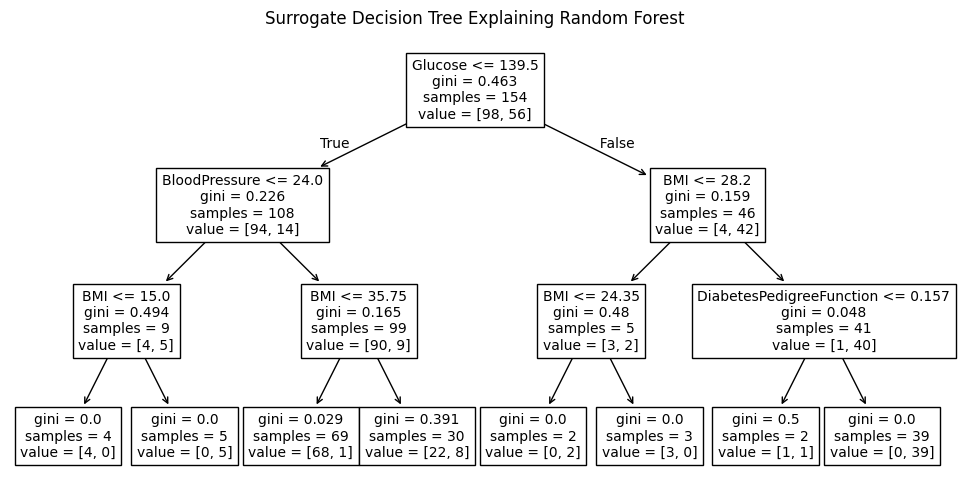

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Load real dataset
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train RandomForest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Predict with the RandomForest
rf_preds = rf_model.predict(X_test)

# 5. Train a surrogate Decision Tree on RF predictions
surrogate = DecisionTreeClassifier(max_depth=3, random_state=42)
surrogate.fit(X_test, rf_preds)

# 6. Plot the surrogate tree
plt.figure(figsize=(12, 6))
plot_tree(
    surrogate,
    # feature_names=X.columns,
    # class_names=['No Diabetes', 'Diabetes'],
    # filled=True,
    # rounded=True,
    fontsize=10
)
plt.title("Surrogate Decision Tree Explaining Random Forest")
plt.show()


In [1]:
from sklearn.inspection import PartialDependenceDisplay

In [4]:
lime?


Type:        module
String form: <module 'lime' from 'C:\\Users\\saiha\\anaconda3\\envs\\XAI_Env\\lib\\site-packages\\lime\\__init__.py'>
File:        c:\users\saiha\anaconda3\envs\xai_env\lib\site-packages\lime\__init__.py
Docstring:   <no docstring>

In [6]:
import lime

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils import normalize
from tf_keras_vis.utils.backprop_modifier import modify_backprop
# Load pre-trained model
model = load_model('VGG16.h5')

# Preprocess image
img_path = 'Dataset/lion.jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

# Define score function for top predicted class
score = CategoricalScore([np.argmax(model.predict(img_input))])

# Apply guided backpropagation
@modify_backprop(modifier='guided')
def guided_model(mod):
    return mod

saliency = Saliency(guided_model(model),
                    model_modifier=ReplaceToLinear())

saliency_map = saliency(score, img_input)
saliency_map = normalize(saliency_map)

# Visualize
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(saliency_map[0], cmap='jet')
plt.title("Guided Backpropagation")
plt.axis('off')

plt.tight_layout()
plt.show()


ValueError: Name tf.RaggedTensorSpec has already been registered for class tensorflow.python.ops.ragged.ragged_tensor.RaggedTensorSpec.

In [24]:
pip show tf_keras_vis

Name: tf-keras-visNote: you may need to restart the kernel to use updated packages.

Version: 0.8.7
Summary: Neural network visualization toolkit for tf.keras
Home-page: https://github.com/keisen/tf-keras-vis
Author: keisen (Yasuhiro Kubota)
Author-email: k.keisen@gmail.com
License: 
Location: d:\sem6\xai_lab_req\xai_env\lib\site-packages
Requires: deprecated, imageio, packaging, pillow, scipy
Required-by: 


In [3]:
import torchcam

In [2]:
pip install torchcam

     ---------------------------------------- 0.0/46.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/46.0 kB ? eta -:--:--
     -------------------------------------- 46.0/46.0 kB 761.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from torchcam.methods import GradCAM, GuidedBackprop

# --- 1. Load Pre-trained VGG16 Model ---
vgg16 = models.vgg16(pretrained=True).eval().to("cuda" if torch.cuda.is_available() else "cpu")

# --- 2. Image Preprocessing ---
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def load_img(image_path):
    img_pil = Image.open(image_path).resize((224, 224)) # PIL for visualization
    img_array = np.array(img_pil) / 255.0 # Numpy array for visualization
    img_tensor = preprocess(img_pil).unsqueeze(0).to(vgg16.device) # Tensor for model input
    return img_tensor, img_pil, img_array

# --- 3. Visualization Functions ---
def visualize_heatmap(heatmap, original_image_array, ax, alpha=0.5, colormap='jet'):
    heatmap_np = heatmap.squeeze().cpu().numpy()
    ax.imshow(original_image_array)
    ax.imshow(heatmap_np, cmap=colormap, alpha=alpha, extent=(0, original_image_array.shape[1], original_image_array.shape[0], 0), interpolation='bilinear')
    return ax

def visualize_saliency_map(saliency_map, original_image_array, ax, alpha=0.5, colormap='viridis'): # viridis for saliency
    saliency_np = saliency_map.squeeze().cpu().numpy()
    ax.imshow(original_image_array)
    ax.imshow(saliency_np, cmap=colormap, alpha=alpha, extent=(0, original_image_array.shape[1], original_image_array.shape[0], 0), interpolation='bilinear')
    return ax

def visualize_guided_backprop(guided_backprop, original_image_array, ax, alpha=0.7): # Adjusted alpha for GBP
    gbp_np = guided_backprop.cpu().numpy()
    gbp_np = np.transpose(gbp_np, (1, 2, 0)) # C, H, W -> H, W, C
    gbp_np = (gbp_np - gbp_np.min()) / (gbp_np.max() - gbp_np.min()) # Normalize GBP to 0-1 for visualization
    ax.imshow(original_image_array)
    ax.imshow(gbp_np, alpha=alpha, extent=(0, original_image_array.shape[1], original_image_array.shape[0], 0), interpolation='bilinear') # No colormap for GBP usually
    return ax


# --- 4. Explanation Methods ---
def get_gradcam(image_tensor, model, target_layer):
    grad_cam = GradCAM(model=model, layer=target_layer)
    cam = grad_cam(image_tensor, None)[0]
    return cam

def get_saliency_map(image_tensor, model):
    image_tensor.requires_grad_()
    output = model(image_tensor)
    _, predicted_class = torch.max(output, 1)
    score = output[0, predicted_class]
    model.zero_grad()
    score.backward()
    saliency = image_tensor.grad.data.abs().cpu()
    saliency_map = saliency.sum(dim=1, keepdim=True) # Sum across color channels
    saliency_map = (saliency_map - saliency_map.min()) / (saliency_map.max() - saliency_map.min()) # Normalize
    return saliency_map

def get_guided_backpropagation(image_tensor, model, target_layer):
    gbp = GuidedBackprop(model=model, layer=target_layer)
    gbp_cam = gbp(image_tensor, None)
    gbp_cam = gbp_cam[0]
    return gbp_cam


# --- 5. Main Execution ---
if __name__ == '__main__':
    image_path = 'path/to/your/image.jpg' # Replace with your image path
    img_tensor, original_image_pil, original_image_array = load_img(image_path)

    target_layer = vgg16.features[-1] # Last conv layer

    # --- Generate Explanations ---
    gradcam_heatmap = get_gradcam(img_tensor, vgg16, target_layer)
    saliency_map = get_saliency_map(img_tensor, vgg16)
    guided_bp = get_guided_backpropagation(img_tensor, vgg16, target_layer)


    # --- 6. Plotting ---
    f, ax = plt.subplots(1, 4, figsize=(15, 5)) # 4 subplots now

    ax[0].imshow(original_image_array)
    ax[0].set_title("Original")
    ax[0].axis('off')

    ax[1].set_title("Grad-CAM")
    ax[1].axis('off')
    visualize_heatmap(gradcam_heatmap, original_image_array, ax[1])

    ax[2].set_title("Saliency Map")
    ax[2].axis('off')
    visualize_saliency_map(saliency_map, original_image_array, ax[2])

    ax[3].set_title("Guided Backprop")
    ax[3].axis('off')
    visualize_guided_backprop(guided_bp, original_image_array, ax[3])


    plt.tight_layout()
    plt.show()